<a href="https://colab.research.google.com/github/sreya-rc/TF2.0/blob/main/TF2_0_Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
# Install TensorFlow
try:
  %tensorflow_version 2.x # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [150]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

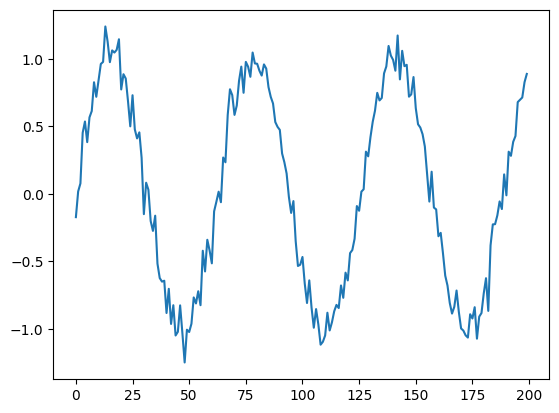

In [151]:
# Make the original synthetic dataset
series = np.sin(0.1*np.arange(200)) + np.random.randn(200) * 0.1

# Plot the series
plt.plot(series)
plt.show()

In [152]:
# Build the dataset
# T = 10 -> use 10 previous timestamps to predict the next timestamp
# X and Y will start as lists and will be cast as arrays
T = 10
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape:", X.shape, "Y.shape", Y.shape)    # X = (N x T), Y = (N)

X.shape: (190, 10) Y.shape (190,)


In [153]:
# Build autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)   # one output
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(0.1)
)

# Train RNN
# The model trains only on the first half of the dataset and validates on the second half
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 63ms/step - loss: 0.4441 - val_loss: 0.4445
Epoch 2/80
3/3 [==============================] - 0s 14ms/step - loss: 0.4688 - val_loss: 0.0938
Epoch 3/80
3/3 [==============================] - 0s 22ms/step - loss: 0.1219 - val_loss: 0.2426
Epoch 4/80
3/3 [==============================] - 0s 16ms/step - loss: 0.2326 - val_loss: 0.0619
Epoch 5/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0429 - val_loss: 0.0852
Epoch 6/80
3/3 [==============================] - 0s 13ms/step - loss: 0.1095 - val_loss: 0.0889
Epoch 7/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0559 - val_loss: 0.0253
Epoch 8/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0483 - val_loss: 0.0494
Epoch 9/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0524 - val_loss: 0.0187
Epoch 10/80
3/3 [==============================] - 0s 13ms/step - loss: 0.0329 - val_loss: 0.0347
Epoch 11/80
3/3 [============

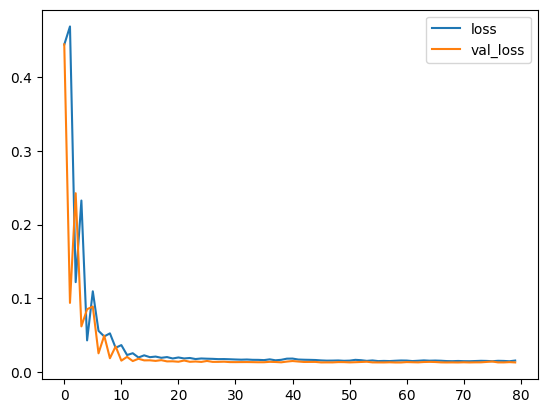

In [154]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [155]:
# Doing a forecast using the "incorrect" method
validation_target = Y[-N//2:]   # Validation target ==  second half of Y
validation_predictions = []

# Index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0]    # (1 x 1) array --> scalar transformation
  i += 1

  # Update predcitions list
  validation_predictions.append(p)

1/1 [==============================] - 0s 15ms/step


'Forecasting the incorrect way'

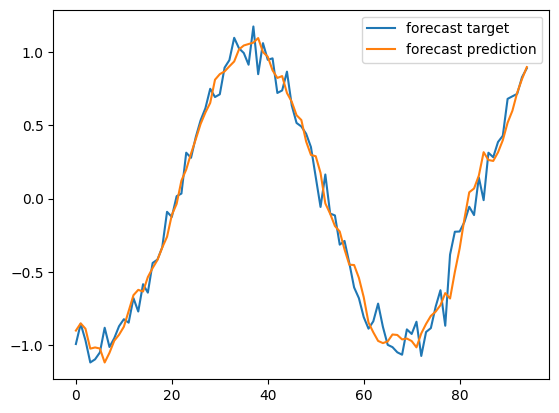

In [156]:
# Plot predictions against the targets
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

'''Forecasting the incorrect way'''

In [157]:
# Forecast future values (use only self-predictions for making future predictions)
validation_target = Y[-N//2:]   # Validation target ==  second half of Y
validation_predictions = []

# Last train input
last_x = X[-N//2]    # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0]    # (1 x 1) array --> scalar transformation

  # Update the predictions list
  validation_predictions.append(p)

  # Make the new input
  # Shift all values of input array to the left - rightmost value moves to the very left, but gets replaced by p
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 21ms/step


'Forecasting the correct way'

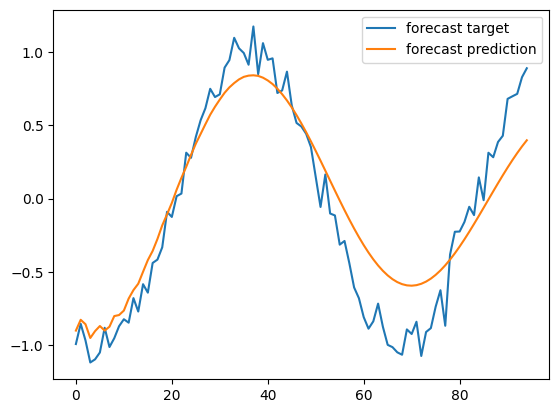

In [158]:
# Plot predictions against the targets
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

'''Forecasting the correct way'''